In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('1hour.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53886 entries, 0 to 53885
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  53886 non-null  object 
 1   open       53886 non-null  float64
 2   high       53886 non-null  float64
 3   low        53886 non-null  float64
 4   close      53886 non-null  float64
 5   volume     53886 non-null  float64
dtypes: float64(5), object(1)
memory usage: 2.5+ MB


DATA PREPROCESSING

In [3]:
df.isnull().sum()

timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y:%m:%d %H:%M:%S')

In [6]:
df = df.sort_values('timestamp')

In [7]:
df['Price Change']=df['close'] - df['open']
df['Volatility']=df['high'] - df['low']/ df['open']
df['Rolling_Mean_Close']=df['close'].rolling(window=5).mean()
df['Rolling_Std_Close']=df['close'].rolling(window=5).std()
df['Target_Close']=df['close'].shift(-1)
df['Target_Movement']=(df['close'].shift(-1)>df['close']).astype(int)
df['vol_1h'] = df['high'] - df['low']
df['vol_1h_next'] = df['vol_1h'].shift(-1)
median_vol = df['vol_1h_next'].median()
df['vol_regime'] = (df['vol_1h_next'] > median_vol).astype(int)
window = 6
df['vol_mean_6h'] = df['vol_1h'].rolling(window).mean()
df['vol_std_6h']  = df['vol_1h'].rolling(window).std()
df['vol_max_6h']  = df['vol_1h'].rolling(window).max()
df['vol_min_6h']  = df['vol_1h'].rolling(window).min()
df['return_1h'] = df['close'].pct_change().shift(-1)
df['return_mean_6h'] = df['return_1h'].rolling(window).mean()
df['return_std_6h'] = df['return_1h'].rolling(window).std()
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
import ta
df['rsi'] = ta.momentum.RSIIndicator(close=df['close'], window=14).rsi()
df['macd'] = ta.trend.MACD(close=df['close']).macd()
bb = ta.volatility.BollingerBands(close=df['close'])
df['bb_high'] = bb.bollinger_hband()
df['bb_low'] = bb.bollinger_lband()
df['ema_10'] = df['close'].ewm(span=10).mean()
df['ema_30'] = df['close'].ewm(span=30).mean()
df['high_low_ratio'] = df['high'] / df['low']
df['close_open_diff'] = df['close'] - df['open']
df['close_lag_1'] = df['close'].shift(1)
df['volume_lag_1'] = df['volume'].shift(1)
df['rolling_max_6h'] = df['close'].rolling(window=6).max()
df['rolling_min_6h'] = df['close'].rolling(window=6).min()
df['price_volatility_interaction'] = df['close'] * df['Volatility']
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['day_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['day_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

In [8]:
df.isnull().sum()

timestamp                        0
open                             0
high                             0
low                              0
close                            0
volume                           0
Price Change                     0
Volatility                       0
Rolling_Mean_Close               4
Rolling_Std_Close                4
Target_Close                     1
Target_Movement                  0
vol_1h                           0
vol_1h_next                      1
vol_regime                       0
vol_mean_6h                      5
vol_std_6h                       5
vol_max_6h                       5
vol_min_6h                       5
return_1h                        1
return_mean_6h                   6
return_std_6h                    6
hour                             0
dayofweek                        0
day                              0
rsi                             13
macd                            25
bb_high                         19
bb_low              

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53860 entries, 25 to 53884
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     53860 non-null  datetime64[ns]
 1   open                          53860 non-null  float64       
 2   high                          53860 non-null  float64       
 3   low                           53860 non-null  float64       
 4   close                         53860 non-null  float64       
 5   volume                        53860 non-null  float64       
 6   Price Change                  53860 non-null  float64       
 7   Volatility                    53860 non-null  float64       
 8   Rolling_Mean_Close            53860 non-null  float64       
 9   Rolling_Std_Close             53860 non-null  float64       
 10  Target_Close                  53860 non-null  float64       
 11  Target_Movement               53

In [12]:
df.columns

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'Price Change',
       'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close', 'Target_Close',
       'Target_Movement', 'vol_1h', 'vol_1h_next', 'vol_regime', 'vol_mean_6h',
       'vol_std_6h', 'vol_max_6h', 'vol_min_6h', 'return_1h', 'return_mean_6h',
       'return_std_6h', 'hour', 'dayofweek', 'day', 'rsi', 'macd', 'bb_high',
       'bb_low', 'ema_10', 'ema_30', 'high_low_ratio', 'close_open_diff',
       'close_lag_1', 'volume_lag_1', 'rolling_max_6h', 'rolling_min_6h',
       'price_volatility_interaction', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos'],
      dtype='object')

EDA

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_27336\932282961.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target_Movement', data=df, palette='Set2')


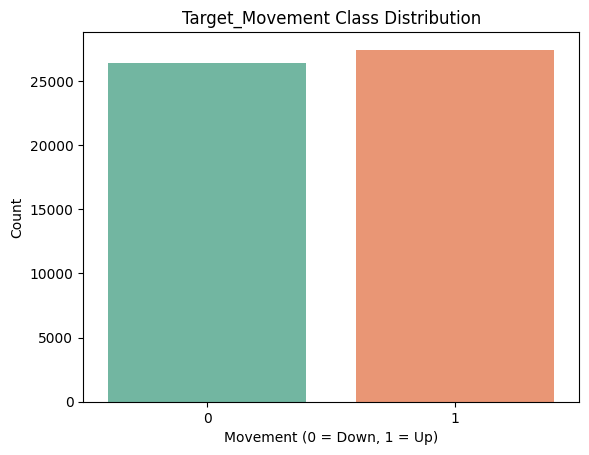

In [13]:
sns.countplot(x='Target_Movement', data=df, palette='Set2')
plt.title("Target_Movement Class Distribution")
plt.xlabel("Movement (0 = Down, 1 = Up)")
plt.ylabel("Count")
plt.show()

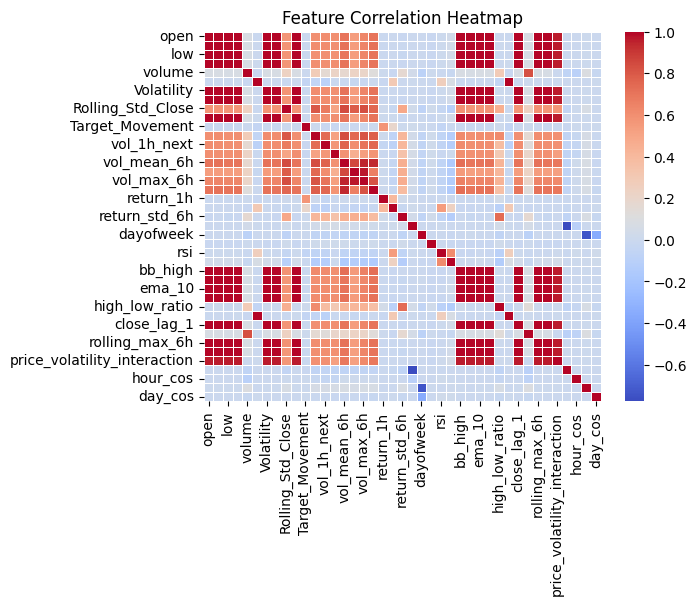

In [14]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\MOHIT\AppData\Local\Temp\ipykernel_27336\2361006096.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target_Movement', y='rsi', data=df, palette='cool')


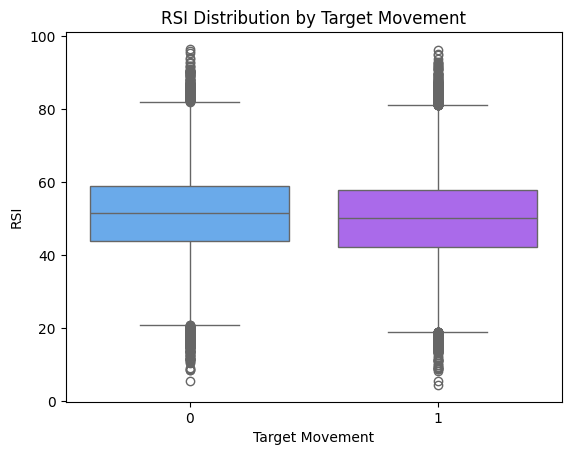

In [15]:
sns.boxplot(x='Target_Movement', y='rsi', data=df, palette='cool')
plt.title("RSI Distribution by Target Movement")
plt.xlabel("Target Movement")
plt.ylabel("RSI")
plt.show()

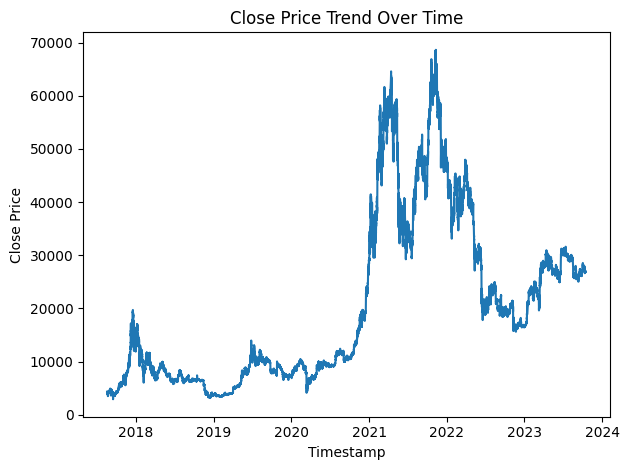

In [16]:
plt.plot(df['timestamp'], df['close'], label='Close Price')
plt.title("Close Price Trend Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Close Price")
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MODEL 1


In [18]:
x=df[['open', 'high', 'low', 'close', 'volume']]

In [19]:
x.head()

,open,high,low,close,volume
25,4287.92,4340.62,4250.04,4313.56,64.169286
26,4313.56,4316.98,4247.75,4279.46,64.235424
27,4279.46,4304.67,4270.48,4300.25,69.186804
28,4285.00,4320.71,4259.85,4282.73,74.829849
29,4265.33,4327.25,4265.33,4304.15,45.653156


In [20]:
y=df['Target_Close']
y.head()

25    4279.46
26    4300.25
27    4282.73
28    4304.15
29    4356.31
Name: Target_Close, dtype: float64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
#Linear Regression
lr2 = LinearRegression()
lr2.fit(x_train, y_train)

LinearRegression()

In [24]:
y_pred=lr2.predict(x_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 41051.35801491931
Mean Absolute Error: 102.57500639272135
R^2 Score: 0.999838122882835


In [26]:
y_pred2=lr2.predict(x_train)

In [27]:
mse2 = mean_squared_error(y_train, y_pred2)
mae2 = mean_absolute_error(y_train, y_pred2)
r22 = r2_score(y_train, y_pred2)
print(f"Mean Squared Error: {mse2}")
print(f"Mean Absolute Error: {mae2}")
print(f"R^2 Score: {r22}")

Mean Squared Error: 40193.06649160591
Mean Absolute Error: 99.79671700583903
R^2 Score: 0.9998393919786962


In [28]:
from sklearn.model_selection import TimeSeriesSplit

In [29]:
tscv = TimeSeriesSplit(n_splits=5) 

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Example models for comparison
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    mse_scores = []
    mae_scores = []
    r2_scores = []

    for train_index, test_index in tscv.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(x_train, y_train)
        y_pred4 = model.predict(x_test)

        mse_scores.append(mean_squared_error(y_test, y_pred4))
        mae_scores.append(mean_absolute_error(y_test, y_pred4))
        r2_scores.append(r2_score(y_test, y_pred4))
    
    results[name] = {
        'Average MSE': np.mean(mse_scores),
        'Average MAE': np.mean(mae_scores),
        'Average R²': np.mean(r2_scores)
    }

for name, metrics in results.items():
    print(f"\n--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


--- Linear Regression ---
Average MSE: 45077.5043
Average MAE: 106.3812
Average R²: 0.9992

--- Random Forest ---
Average MSE: 103088041.4156
Average MAE: 3757.0406
Average R²: 0.5537

--- Gradient Boosting ---
Average MSE: 103986958.0470
Average MAE: 3797.5986
Average R²: 0.5493


In [31]:
tscv = TimeSeriesSplit(n_splits=5) 

In [32]:
mse_scores = []
mae_scores = []
r2_scores = []

In [33]:
scaler = StandardScaler()

In [34]:
for fold, (train_index, test_index) in enumerate(tscv.split(x)):
    print(f"--- Fold {fold+1}/{tscv.get_n_splits()} ---")
    
    # Split data into training and test sets for the current fold
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

--- Fold 1/5 ---
--- Fold 2/5 ---
--- Fold 3/5 ---
--- Fold 4/5 ---
--- Fold 5/5 ---


In [35]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, 
                         learning_rate=0.1, max_depth=5, random_state=42)

In [36]:
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
  y_pred = model.predict(X_test_scaled)

In [38]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse_scores.append(mse)
mae_scores.append(mae)
r2_scores.append(r2)

print(f"  MSE: {mse:.4f}")
print(f"  MAE: {mae:.4f}")
print(f"  R^2: {r2:.4f}")

  MSE: 298081.0811
  MAE: 349.7886
  R^2: 0.9860


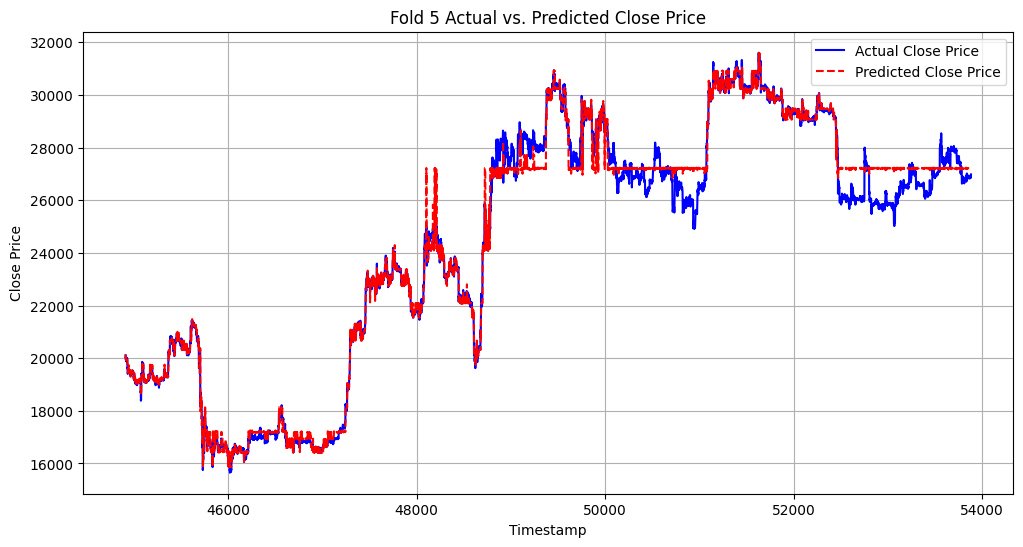

In [39]:
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
    plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
    plt.title(f'Fold {fold+1} Actual vs. Predicted Close Price')
    plt.xlabel('Timestamp')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [40]:
print("\n--- Average Scores Across All Folds ---")
print(f"Average MSE: {np.mean(mse_scores):.4f}")
print(f"Average MAE: {np.mean(mae_scores):.4f}")
print(f"Average R^2: {np.mean(r2_scores):.4f}")


--- Average Scores Across All Folds ---
Average MSE: 298081.0811
Average MAE: 349.7886
Average R^2: 0.9860


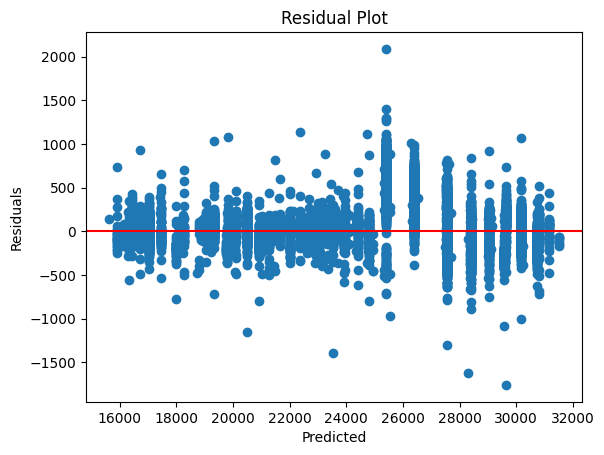

In [41]:
residuals = y_test - y_pred4
plt.scatter(y_pred4, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='red')
plt.show()

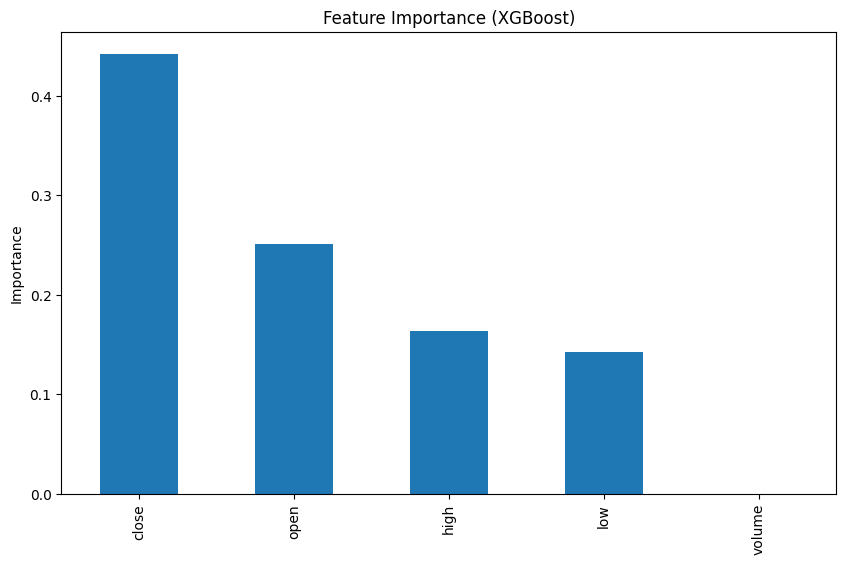

In [42]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(model.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance (XGBoost)')
plt.ylabel('Importance')
plt.show()

MODEL 2


In [43]:
X=df[['volume', 'Price Change', 'Volatility', 'Rolling_Mean_Close', 'Rolling_Std_Close',
       'vol_mean_6h', 'vol_std_6h', 'vol_max_6h', 'vol_min_6h', 'return_1h', 'return_mean_6h',
       'return_std_6h', 'hour', 'dayofweek', 'day', 'rsi', 'macd', 'bb_high',
       'bb_low', 'ema_10', 'ema_30', 'high_low_ratio', 'close_open_diff',
       'close_lag_1', 'volume_lag_1', 'rolling_max_6h', 'rolling_min_6h',
       'price_volatility_interaction', 'hour_sin', 'hour_cos', 'day_sin',
       'day_cos']]
X.head()

,volume,Price Change,Volatility,Rolling_Mean_Close,Rolling_Std_Close,vol_mean_6h,vol_std_6h,vol_max_6h,vol_min_6h,return_1h,...,close_open_diff,close_lag_1,volume_lag_1,rolling_max_6h,rolling_min_6h,price_volatility_interaction,hour_sin,hour_cos,day_sin,day_cos
25,64.169286,25.64,4339.628834,4281.010,26.538217,89.081667,29.595539,134.75,57.96,-0.007905,...,25.64,4287.92,50.797515,4313.56,4243.59,1.871925e+07,0.965926,2.588190e-01,-0.433884,-0.900969
26,64.235424,-34.10,4315.995257,4288.184,17.043492,81.976667,28.113448,134.75,57.96,0.004858,...,-34.10,4313.56,64.169286,4313.56,4243.59,1.847013e+07,1.000000,6.123234e-17,-0.433884,-0.900969
27,69.186804,20.79,4303.672098,4294.716,12.942787,65.216667,18.788214,90.58,34.19,-0.004074,...,20.79,4279.46,64.235424,4313.56,4267.59,1.850687e+07,0.965926,-2.588190e-01,-0.433884,-0.900969
28,74.829849,-2.27,4319.715869,4292.784,14.050389,64.586667,18.874594,90.58,34.19,0.005001,...,-2.27,4300.25,69.186804,4313.56,4279.46,1.850018e+07,0.866025,-5.000000e-01,-0.433884,-0.900969
29,45.653156,38.82,4326.250000,4296.030,14.512913,62.456667,18.214619,90.58,34.19,0.012119,...,38.82,4282.73,74.829849,4313.56,4279.46,1.862083e+07,0.707107,-7.071068e-01,-0.433884,-0.900969


In [44]:
y=df['Target_Movement']
y.head()

25    0
26    1
27    0
28    1
29    1
Name: Target_Movement, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
def run_all_classifiers(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates classifiers with hyperparameter tuning.
    Also performs KMeans Elbow and PCA visualization.
    """
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scaler = StandardScaler().fit(X_train)
    Xtr = scaler.transform(X_train)
    Xte = scaler.transform(X_test)

    models = {
        "KNN": (KNeighborsClassifier(), {"n_neighbors": range(1, 11)}),
        "SVM": (SVC(), {
            "kernel": ["linear", "rbf"],
            "C": [0.1, 1, 10],
            "gamma": [1, 0.1, 0.01]
        }),
        "NaiveBayes": (GaussianNB(), {}),
        "DecisionTree": (DecisionTreeClassifier(random_state=42), {
            "max_depth": [None, 5, 10],
            "min_samples_leaf": [1, 3]
        }),
        "RandomForest": (RandomForestClassifier(random_state=42), {
            "n_estimators": [50, 100],
            "max_depth": [None, 10]
        }),
        "LogisticRegression": (LogisticRegression(max_iter=1000), {
            "C": [0.01, 0.1, 1, 10]
        })
    }

    print("\n=== CLASSIFICATION RESULTS ===")

    for name, (estimator, grid) in models.items():
        pipe = Pipeline([("scaler", StandardScaler()), ("clf", estimator)])

        if grid:
            search = GridSearchCV(pipe, {f"clf__{k}": v for k, v in grid.items()}, cv=cv, scoring="accuracy", n_jobs=-1)
            search.fit(Xtr, y_train)
            model = search.best_estimator_
            best_params = search.best_params_
            cv_score = search.best_score_
        else:
            model = pipe.fit(Xtr, y_train)
            best_params = "default"
            cv_score = cross_val_score(pipe, Xtr, y_train, cv=cv).mean()

        y_pred = model.predict(Xte)
        test_acc = accuracy_score(y_test, y_pred)

        print(f"\n🔍 {name}")
        print(f"CV Accuracy: {cv_score:.2%}")
        print(f"Test Accuracy: {test_acc:.2%}")
        print(f"Best Params: {best_params}")
        print(classification_report(y_test, y_pred, zero_division=0))

    # KMeans Elbow
    print("\n=== KMEANS ELBOW CURVE ===")
    inertias = []
    for k in range(1, 11):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(Xtr)
        inertias.append(km.inertia_)
    plt.plot(range(1, 11), inertias, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("KMeans Elbow Curve")
    plt.show()

    # PCA Plot
    print("\n=== PCA VISUALIZATION ===")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(Xtr)
    print("Explained Variance Ratios:", pca.explained_variance_ratio_)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap="tab10", alpha=0.6)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Projection (Train Set)")
    plt.show()